In [1]:
import pandas as pd
import numpy as np

In [2]:
trade_df = pd.read_csv('../Datasets/d3a-simulation-data/simulation3/Grid_trades.csv')

In [3]:
f = lambda x: " ".join(x.split("T"))
trade_df['datetime'] = trade_df['slot'].apply(f)
trade_df.set_index(pd.to_datetime(trade_df.datetime), drop=True, inplace=True)
trade_df.drop(columns=['slot', 'datetime'], inplace=True)
features = ['rate [ct./kWh]', 'energy [kWh]']

In [4]:
trade_df.head()

,rate [ct./kWh],energy [kWh],buyer,seller
datetime,,,,
2014-03-08 00:14:00,27.0,0.040948,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.044894,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.176370,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.054732,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.058497,IAA ZIP code,Market Maker


In [5]:
trade_df.groupby('buyer').mean()

,rate [ct./kWh],energy [kWh]
buyer,,
IAA ZIP code,27.002378,0.135124
Market Maker,19.000000,0.708942


In [6]:
trade_df.groupby('buyer').sum()

,rate [ct./kWh],energy [kWh]
buyer,,
IAA ZIP code,324811.6,1625.400680
Market Maker,18677.0,696.890382


In [7]:
community_buy_df_qty = trade_df[trade_df['buyer'] == 'IAA ZIP code'][features[1]].resample('15Min').sum()
community_sell_df_qty = trade_df[trade_df['seller'] == 'IAA ZIP code'][features[1]].resample('15Min').sum()

In [8]:
community_trades = trade_df

In [9]:
community_trades['buy/sell'] = 'Sell' if community_trades['seller'] == 'IAA ZIP code' else 'Buy'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [10]:
community_trades.assign(buy_sell='sell' if community_trades['seller']=='IAA ZIP code' else 'buy')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
community_trades['buy/sell'].where(community_trades['seller'] == 'IAA ZIP code', 'sell')

KeyError: 'buy/sell'

In [12]:
trade_df

,rate [ct./kWh],energy [kWh],buyer,seller
datetime,,,,
2014-03-08 00:14:00,27.0,0.040948,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.044894,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.176370,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.054732,IAA ZIP code,Market Maker
2014-03-08 00:14:00,27.0,0.058497,IAA ZIP code,Market Maker
...,...,...,...,...
2014-03-14 23:59:00,27.0,0.092786,IAA ZIP code,Market Maker
2014-03-14 23:59:15,27.0,0.037923,IAA ZIP code,Market Maker
2014-03-14 23:59:15,27.0,0.120316,IAA ZIP code,Market Maker


In [13]:
community_sell_df_qty

datetime
2014-03-08 08:45:00    0.002720
2014-03-08 09:00:00    0.431057
2014-03-08 09:15:00    0.000000
2014-03-08 09:30:00    0.397843
2014-03-08 09:45:00    0.000000
                         ...   
2014-03-14 14:15:00    5.602712
2014-03-14 14:30:00    5.340168
2014-03-14 14:45:00    5.028678
2014-03-14 15:00:00    3.880531
2014-03-14 15:15:00    0.343749
Freq: 15T, Name: energy [kWh], Length: 603, dtype: float64

<AxesSubplot:xlabel='datetime'>

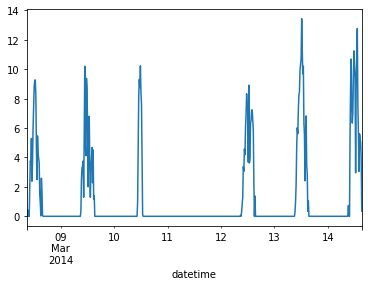

In [14]:
community_sell_df_qty.plot()

In [15]:
community_buy_df_qty

datetime
2014-03-08 00:00:00    1.627069
2014-03-08 00:15:00    1.869198
2014-03-08 00:30:00    1.524104
2014-03-08 00:45:00    1.956337
2014-03-08 01:00:00    2.890830
                         ...   
2014-03-14 22:45:00    4.486802
2014-03-14 23:00:00    4.519848
2014-03-14 23:15:00    3.613952
2014-03-14 23:30:00    3.841869
2014-03-14 23:45:00    3.348557
Freq: 15T, Name: energy [kWh], Length: 672, dtype: float64

<AxesSubplot:xlabel='datetime'>

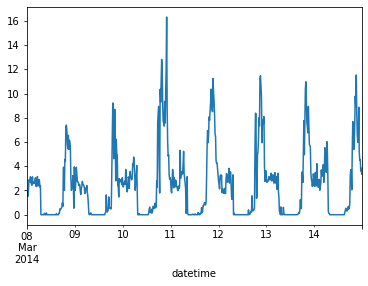

In [16]:
community_buy_df_qty.plot()

In [17]:
for i in range(1,4):
    print(pd.read_csv('../Datasets/d3a-simulation-data/simulation%s/Grid_trades.csv' %(i)).slot.min())
    print(pd.read_csv('../Datasets/d3a-simulation-data/simulation%s/Grid_trades.csv' %(i)).slot.max())

2014-03-01T00:14:00
2014-03-07T23:59:15
2014-03-08T00:14:00
2014-03-14T23:59:00
2014-03-08T00:14:00
2014-03-14T23:59:15


In [18]:
balancing_df = pd.read_csv('../Datasets/oracle-data/20201001_20201231_NRV-cooperation_13112020_125032.csv', delimiter=';')

In [19]:
balancing_df.set_index(pd.to_datetime(balancing_df['DATE'] + ' ' + balancing_df['TIME_FROM']), drop=True, inplace=True)

In [20]:
balancing_df.drop(columns=['DATE', 'TIME_FROM', 'TIME_TO', 'IDAEP_GERMANY_COMMENT', 'IDAEP_GERMANY_VALUE_QA_[EUR/MWH]'], inplace=True)

In [21]:
balancing_df

,IDAEP_GERMANY_VALUE_OP_[EUR/MWH]
2020-01-10 00:00:00,"36,200"
2020-01-10 00:15:00,"40,360"
2020-01-10 00:30:00,"52,100"
2020-01-10 00:45:00,"40,500"
2020-01-10 01:00:00,"40,680"
...,...
2020-12-31 22:45:00,NaN
2020-12-31 23:00:00,NaN
2020-12-31 23:15:00,NaN
2020-12-31 23:30:00,NaN


In [22]:
balancing_df = balancing_df.apply(lambda x: x.str.replace(',','.'))

In [23]:
balancing_df['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]'] = balancing_df['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]'].astype(float)

<AxesSubplot:>

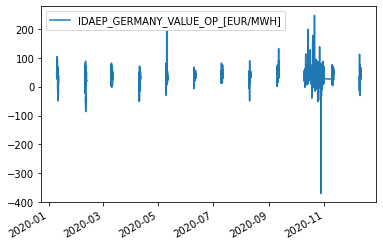

In [24]:
balancing_df.plot()

In [25]:
balancing_aligned = balancing_df.loc['2020-10-17':'2020-11-3']

<AxesSubplot:>

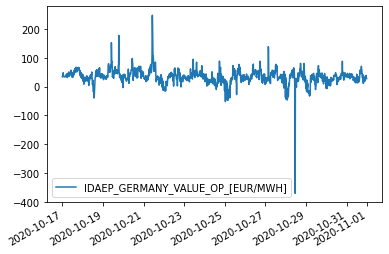

In [26]:
balancing_aligned.plot()

In [27]:
balancing_aligned

,IDAEP_GERMANY_VALUE_OP_[EUR/MWH]
2020-10-17 00:00:00,35.09
2020-10-17 00:15:00,33.56
2020-10-17 00:30:00,35.08
2020-10-17 00:45:00,40.54
2020-10-17 01:00:00,48.15
...,...
2020-10-31 22:45:00,36.22
2020-10-31 23:00:00,38.69
2020-10-31 23:15:00,33.91
2020-10-31 23:30:00,28.87


In [28]:
1444/96

15.041666666666666

<AxesSubplot:>

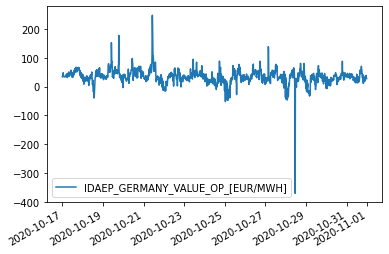

In [29]:
balancing_aligned.plot()

In [30]:
# Lets fix this outlier
balancing_aligned['2020-10-28 11:15:00']

,IDAEP_GERMANY_VALUE_OP_[EUR/MWH]
2020-10-28 11:15:00,-369.92


In [36]:
balancing_aligned['2020-10-28 11:30:00']

,IDAEP_GERMANY_VALUE_OP_[EUR/MWH]
2020-10-28 11:30:00,19.47


In [31]:
balancing_aligned.to_csv('../Datasets/oracle-data/Balancing_prices_aligned_2020-10-17-2020-11-31.csv')

In [32]:
balancing_aligned_non_negative = balancing_aligned['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]'].apply(lambda x: np.maximum(x, 0))

In [33]:
balancing_aligned_non_negative

2020-10-17 00:00:00    35.09
2020-10-17 00:15:00    33.56
2020-10-17 00:30:00    35.08
2020-10-17 00:45:00    40.54
2020-10-17 01:00:00    48.15
                       ...  
2020-10-31 22:45:00    36.22
2020-10-31 23:00:00    38.69
2020-10-31 23:15:00    33.91
2020-10-31 23:30:00    28.87
2020-10-31 23:45:00    27.64
Name: IDAEP_GERMANY_VALUE_OP_[EUR/MWH], Length: 1444, dtype: float64

<AxesSubplot:>

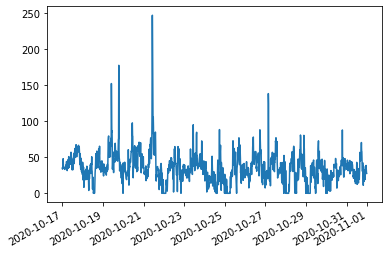

In [34]:
balancing_aligned_non_negative.plot()

In [35]:
balancing_aligned_non_negative.to_csv('../Datasets/oracle-data/Balancing_prices_aligned_non_negative_2020-10-17-2020-11-31.csv')

In [46]:
balancing_aligned_non_negative_rolling = balancing_aligned.copy()

for idx, i in enumerate(balancing_aligned['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]']):
    if idx == 0:
        pass
    else:
        if i<0:
            balancing_aligned_non_negative_rolling.iloc[idx] = last_price
        else:
            last_price = i


In [49]:
balancing_aligned_non_negative_rolling.to_csv('../Datasets/oracle-data/Balancing_prices_aligned_non_negative_rolling_2020-10-17-2020-11-31.csv')